In [209]:
import pandas as pd
import numpy as np
import plotly as plt
import seaborn as sns
import plotly.express as px

In [210]:
df = pd.read_csv('unicornios_ate_set_2022.csv')

Entendendo os dados

In [211]:
df

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [213]:
df.isnull().sum()

Company            0
Valuation ($B)     0
Date Joined        0
Country            0
City               0
Industry           0
Investors         18
dtype: int64

In [214]:
df.describe()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
count,1186,1186,1186,1186,1186,1186,1168
unique,1183,222,695,48,286,34,1152
top,Bolt,$1,7/13/2021,United States,San Francisco,Fintech,Sequoia Capital
freq,2,271,9,636,168,239,3


In [215]:
df.rename(columns={'Company': 'Compania', 
'Valuation ($B)' : 'Valor(dolar)',
'Date Joined' : 'Entrada',
'Country' : 'Pais',
'City\xa0' :'Cidade',
'Industry' : 'Industria',
'Investors' : 'Investidores'
}, inplace=True)

In [216]:
#separando a data em dia, mes e ano
df[['Mes_Entrada','Dia_Entrada','Ano_Entrada']] = df['Entrada'].str.split('/', expand=True)

#Trazendo os valores de data para inteiro 
df['Ano_Entrada'] = df['Ano_Entrada'].astype(int)
df['Mes_Entrada'] = df['Mes_Entrada'].astype(int)
df['Dia_Entrada'] = df['Dia_Entrada'].astype(int)

#Mudando o valor para float
df['Valor(dolar)'].str.rstrip('$')
df['Valor(dolar)'] = df['Valor(dolar)'].str.replace('$', '')
df['Valor(dolar)'] = df['Valor(dolar)'].astype(float)

#dropando a data
df.drop(columns='Entrada', inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_14852\3994814601.py:11: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



<AxesSubplot: xlabel='Ano_Entrada', ylabel='Valor(dolar)'>

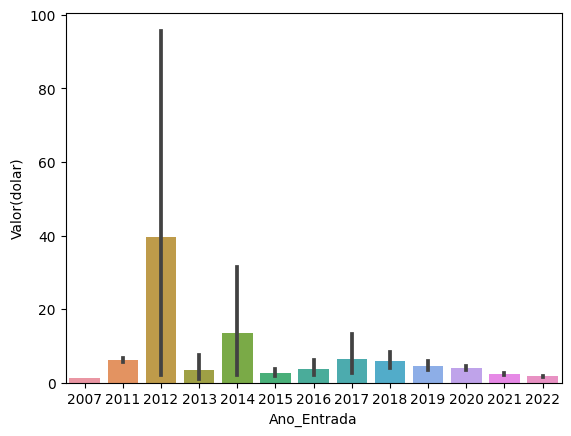

In [217]:
sns.barplot(data = df, x = 'Ano_Entrada', y= 'Valor(dolar)')

In [218]:
df['Ano_Entrada'].value_counts()

2021    529
2022    228
2020    108
2019    102
2018     98
2017     44
2015     34
2016     21
2014     12
2012      4
2013      3
2011      2
2007      1
Name: Ano_Entrada, dtype: int64

In [219]:
df.loc[df['Ano_Entrada'] == 2012]

,Compania,Valor(dolar),Pais,Cidade,Industria,Investidores,Mes_Entrada,Dia_Entrada,Ano_Entrada
1,SpaceX,127.0,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,1,2012
11,Fanatics,27.0,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",6,6,2012
435,Trendy Group International,2.0,Hong Kong,Kowloon,Consumer & retail,L Capital Partners,2,13,2012
436,Avant,2.0,United States,Chicago,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital",12,17,2012


In [220]:
df['Pais'].value_counts()

United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia             

In [221]:
#agrupando para o gráfico
df_industria = df.groupby('Industria')['Valor(dolar)'].sum()
df_industria= pd.DataFrame(df_industria)
df_industria.reset_index(inplace= True)
df_industria.sort_values(by='Valor(dolar)', ascending=False, inplace=True)

In [222]:
fig = px.bar(df_industria.head(15), 
x ='Industria', 
y = 'Valor(dolar)',
color= 'Valor(dolar)',
labels={'Valor(dolar)':'Valor da Empresa(Bilhão dolar)', 'Industria':'Setores'},
title='Setores mais rentaveis dentre empresas unicórnios.',
color_continuous_scale= px.colors.sequential.Blues)


fig.update_layout(
    template= 'plotly_dark'
)

fig.show()

In [228]:
#agrupando para o gráfico
df_cidade = df.groupby('Cidade')['Valor(dolar)'].sum()
df_cidade= pd.DataFrame(df_cidade)
df_cidade.reset_index(inplace= True)
df_cidade.sort_values(by='Valor(dolar)', ascending=False, inplace=True)

In [242]:
fig = px.bar(df_cidade.head(15), 
x ='Cidade', 
y = 'Valor(dolar)',
color= 'Valor(dolar)',
labels={'Valor(dolar)':'Valor das Empresa na cidade(Bilhão dolar)', 
'Cidade' : 'Cidades'},
title='Cidades com mais rendimento dentre empresas unicórnios.',
color_continuous_scale= px.colors.sequential.Purples)


fig.update_layout(
    template= 'plotly_dark'
)

fig.show()

In [234]:
#Pegando só o brasil
brasil = df.loc[df['Pais'] == 'Brazil']
brasil.sort_values(by='Valor(dolar)', ascending=False, inplace=True)

C:\Users\julia\AppData\Local\Temp\ipykernel_14852\2353252195.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [243]:
fig = px.bar(brasil, 
x ='Compania', 
y = 'Valor(dolar)',
color= 'Valor(dolar)',
labels={'Valor(dolar)':'Valor das Empresas (Bilhão dolar)', 
'Compania' : 'Empresas'},
title='Raking de empresas unicórnio do brasil',
color_continuous_scale= px.colors.sequential.Greens)


fig.update_layout(
    template= 'plotly_dark'
)

fig.show()